In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Reading data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
concat_data = pd.concat([train, test], sort=True).reset_index(drop=True)


In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [52]:
train.shape

(891, 12)

In [53]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

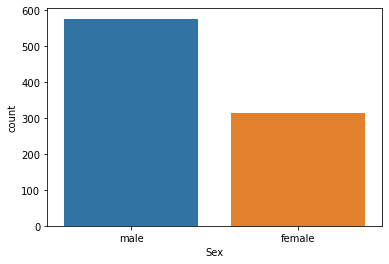

In [55]:
sns.countplot(x = 'Sex', data=train)

In [56]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

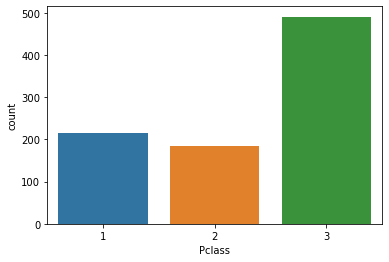

In [57]:
sns.countplot(x='Pclass',data=train)

In [58]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

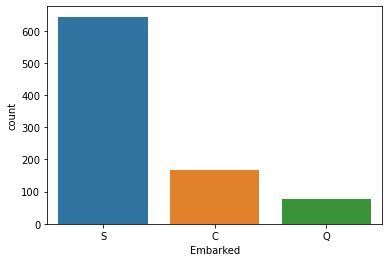

In [59]:
sns.countplot(x='Embarked',data=train)

In [60]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

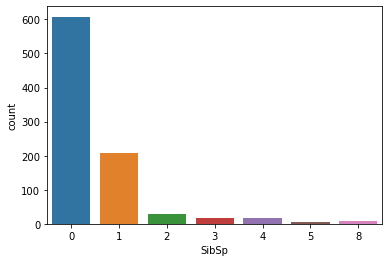

In [61]:
sns.countplot(x='SibSp',data=train)

In [62]:
train['Died'] = 1-train['Survived']

<AxesSubplot:xlabel='Sex'>

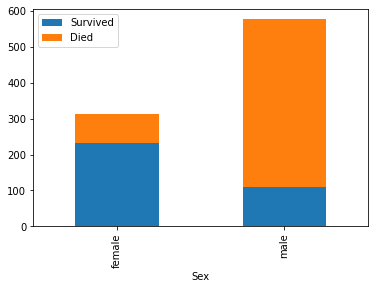

In [63]:
# Visualising survivals based on Gender

train.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar', stacked = True)


<AxesSubplot:xlabel='Sex'>

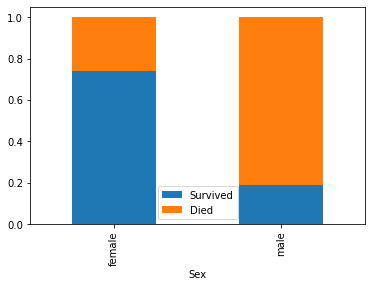

In [64]:
train.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind='bar', stacked=True)

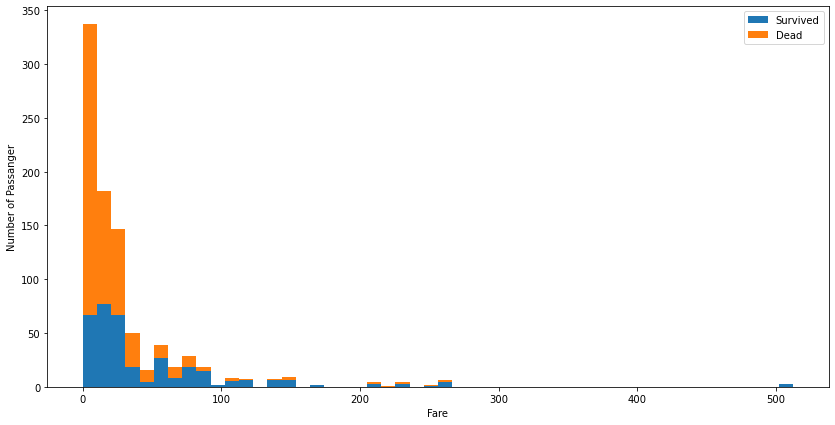

In [65]:
# Visualising Survival based on fare

figure = plt.figure(figsize=(14,7))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']],
        stacked=True, bins = 50,
        label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passanger')
plt.legend()

In [66]:
# Remove Cabin column beacause 75% are empty
concat_data = concat_data.drop(['Cabin'], axis=1)
print('The Cabin column dropped successfully')


The Cabin column dropped successfully


Text(0, 0.5, 'Passenger Count')

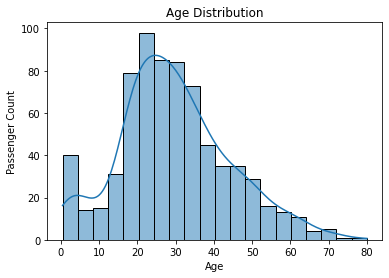

In [67]:
# age distubution
fig = plt.figure()
ad = sns.histplot(x='Age',data=train, kde=True)
ad.set_title('Age Distribution')
ad.set_ylabel('Passenger Count')

In [68]:
# Fill missing values by meadian
concat_data['Age'] = concat_data['Age'].fillna(train['Age'].median())

In [69]:
# Fill missing values of Embark by Mode
concat_data['Embarked'] = concat_data['Embarked'].fillna(train['Embarked'].mode().to_string())

In [70]:
def count_null(dataFrame):
    count = dataFrame.isnull().sum()
    proportion = round(count / len(dataFrame) * 100, 4).astype("string") + '%'
    return pd.concat([count, proportion], axis=1, keys=['Null Count', 'Proportion'])

In [71]:
# Cheak missing values of concat data
count_null(concat_data)

,Null Count,Proportion
Age,0,0.0%
Embarked,0,0.0%
Fare,1,0.0764%
Name,0,0.0%
Parch,0,0.0%
PassengerId,0,0.0%
Pclass,0,0.0%
Sex,0,0.0%
SibSp,0,0.0%
Survived,418,31.9328%


In [72]:
# For fare column their is one missing column
concat_data['Fare'] = concat_data['Fare'].fillna(train['Fare'].mean())

In [73]:
count_null(concat_data)

,Null Count,Proportion
Age,0,0.0%
Embarked,0,0.0%
Fare,0,0.0%
Name,0,0.0%
Parch,0,0.0%
PassengerId,0,0.0%
Pclass,0,0.0%
Sex,0,0.0%
SibSp,0,0.0%
Survived,418,31.9328%


In [74]:
# Handling catgorial data

concat_data['Embarked'].unique()


array(['S', 'C', 'Q', '0    S'], dtype=object)

In [75]:
concat_data.loc[(concat_data['Embarked'] != 'S')&(concat_data['Embarked'] != 'C')&(concat_data['Embarked'] != 'Q'), 'Embarked'] = train['Embarked'].mode()[0]

In [76]:
# replace categorical data with numeric data
concat_data['Embarked'] = concat_data['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype(int)

In [77]:
# # replace categorical data with numeric data
concat_data['Sex'] = concat_data['Sex'].map({'female':0, 'male':1})

In [78]:
# create the Accomanied column, the passenger with the same ticket number is 1, otherwise 0
concat_data['Accompanied'] = concat_data['Ticket'].duplicated(keep=False).astype(int)


In [79]:
# extract the title from the passengers' name
concat_data['Title'] = concat_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
concat_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [80]:
# count the number of each title
concat_data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Jonkheer      1
Don           1
Lady          1
Capt          1
Mme           1
Countess      1
Sir           1
Dona          1
Name: Title, dtype: int64

In [81]:
# replace the title other than ‘Mr’, 'Miss', 'Mrs', and 'Master' is ’Others’.
concat_data['Title'] = concat_data['Title'].replace(['Rev', 'Dr', 'Col', 'Mlle', 'Major', 'Ms', 'Lady', 'Sir', 'Mme', 'Don', 'Capt', 'Countess', 'Jonkheer', 'Dona'], 'Others')
# replace categorical data with numeric data
concat_data['Title'] = concat_data['Title'].map({'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Others':5}) 


In [82]:
# divide the Age into different period

concat_data.loc[(concat_data['Age'] > 0)&(concat_data['Age'] <= 1), 'AgePeriod'] = 1
concat_data.loc[(concat_data['Age'] > 1)&(concat_data['Age'] <= 13), 'AgePeriod'] = 2
concat_data.loc[(concat_data['Age'] > 13)&(concat_data['Age'] <= 25), 'AgePeriod'] = 3
concat_data.loc[(concat_data['Age'] > 25)&(concat_data['Age'] <= 61), 'AgePeriod'] = 4
concat_data.loc[(concat_data['Age'] > 61)&(concat_data['Age'] <= 73), 'AgePeriod'] = 5
concat_data.loc[(concat_data['Age'] > 73)&(concat_data['Age'] <= 85), 'AgePeriod'] = 6
concat_data.loc[(concat_data['Age'] > 85), 'AgePeriod'] = 7
concat_data['AgePeriod'] = concat_data['AgePeriod'].astype(int)

<AxesSubplot:xlabel='AgePeriod', ylabel='count'>

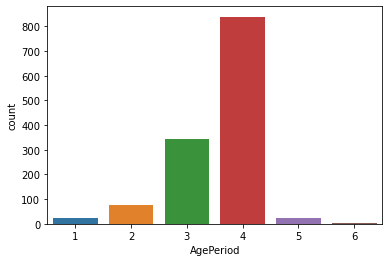

In [85]:
sns.countplot(x='AgePeriod', data=concat_data)


In [36]:
# discretize Fare into equal-sized bins
concat_data['FareBin'] = pd.qcut(concat_data['Fare'], q = 4, labels = [1, 2, 3, 4]).astype(int)

In [37]:
train_data = concat_data.iloc[:891]
test_data = concat_data.iloc[891:]

In [38]:
# import libraries for modeling and prediction
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

<AxesSubplot:>

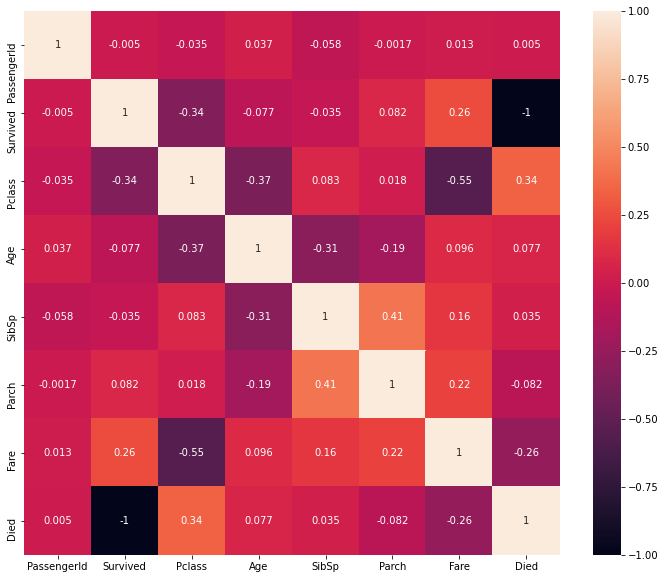

In [39]:
correlation = train.corr()
fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(correlation, annot=True)
fig.add_subplot(ax)


In [40]:
# drop unnecessary columns
dropped_column = ['Age', 'Fare', 'Name', 'Parch', 'SibSp', 'Ticket']
for i in dropped_column:
    concat_data = concat_data.drop([i], axis=1)

In [41]:
# separate training set and test set
train_data = concat_data.iloc[:891]
test_data = concat_data.iloc[891:]
# set feature set
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
# set target set
y = train_data['Survived']

In [42]:
# split training set and test set randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [43]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
acc_score = knn.score(X_train, y_train) * 100
print(acc_score)

83.55704697986577


In [44]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
acc_score = rfc.score(X_train, y_train) * 100
print(acc_score)

87.08053691275168
